# Classificação com Redes Neurais Quânticas: Teoria e Prática

## Introdução
Apresentar as justificativas e o propósito deste trabalho (não deve ser muito longo).

Explicar sua estrutura.

Indicar os objetivos desejados e os alcançados (spoilers).

## Codificação de Dados
Explicar como o estado inicial pode representar o dado a ser classificado.

Avaliar se é conveniente incluir outros tipos de codificação além de qubit encoding, como, por exemplo, oráculo, amplitude encoding ou dados quânticos.

$z=z_1 z_2 \dotsb z_n$

## Arquitetura de Circuitos

O estado de entrada é preparado e então tranformado através de uma sequência de operações unitárias que dependem de um parâmetro (real ou complexo?).

O circuito é composto por n+1 qubits - ignorando possíveis ancillas. O último qubit será utilizado para medição e leitura da saída.

$\{ U_a(\theta) \}$

$U(\vec{\theta})=U_L(\theta_L)U_{L-1}(\theta_{L-1}) \dotsb U_1(\theta_1)$

$\left|z,1\right\rangle=\left|z_1 z_2 \dotsb z_n,1\right\rangle$

$U(\vec{\theta})\left|z,1\right\rangle$


## Parametrização

//lembrete

1- only single-qubit rotations andfixed CNOT gates.

2- more general two-qubit gates.

3- three-qubit gates, where the additional ancilla qubits allow fornon-linear operations. 

## Representação
 
Queremos demonstrar que o modelo de rede neural quântica aqui apresentado é capaz de expressar qualquer função de rótulo com dois valores, mesmo que, possivelmente, com um alto custo em termos de profundidade do circuito.

Para n bits, temos $2^n$ strings e, portanto, $2^{(2^n)}$ possíveis funções de rótulo $l(z)$. Dada uma função de rótulo, considere o operador cuja ação é definida nos estados da base computacional como

$$
\begin{equation}
U_l \left|z, z_{n+1}\right\rangle = e^{i \frac{\pi}{4} l(z) X_{n+1}} \left|z,z_{n+1}\right\rangle
\end{equation}
$$

que é a rotação de $\frac{\pi}{4}$ do qubit de saída ($z_{n+1}$) sobre o eixo $x$. De maneira equivalente

$$
\begin{align}
U_l^\dagger Y_{n+1} U_l
&=\left( e^{-i \frac{\pi}{4} l(z) X_{n+1}} \right) Y_{n+1} \left( e^{i \frac{\pi}{4} l(z) X_{n+1}} \right) \\
&=\left[ cos \left(\frac{\pi}{4}l(Z) \right)I - i sen \left(\frac{\pi}{4}l(Z) \right)X_{n+1} \right] Y_{n+1} \left[ cos \left(\frac{\pi}{4}l(Z) \right)I + i sen \left(\frac{\pi}{4}l(Z) \right)X_{n+1} \right] \\
&=cos \left(\frac{\pi}{2}l(Z) \right)Y_{n+1} + sen \left(\frac{\pi}{2}l(Z) \right)Z_{n+1}
\end{align}
$$

onde $l(Z)$ é um operador diagonal na base computacional. Sabendo que $l(z)=+1, -1$, podemos mostrar que

$$
\begin{align}
\left\langle z,1\right| U_l^\dagger Y_{n+1} U_l \left|z,1\right\rangle 
&=cos \left(\frac{\pi}{2}l(Z) \right)\left\langle z,1\right| Y_{n+1}\left|z,1\right\rangle + sen \left(\frac{\pi}{2}l(Z) \right) \left\langle z,1\right| Z_{n+1}\left|z,1\right\rangle \\
&=sen \left(\frac{\pi}{2}l(Z) \right) \left\langle z,1\right| Z_{n+1}\left|z,1\right\rangle \\
&=l(z)
\end{align}
$$

Vemos então, de maneira abstrata, que temos uma forma de representar qualquer rótulo através de um circuito quântico.

Vamos agora explicar como escrever $U_l$ como um produto de uma operação unitária em dois qubits. Para esta discussão é conveniente mudarmos para variáveis Booleanas $b_i=\frac{1}{2}(1-z_i)$ e pensar em nossa função de rótulo $l$ como $1-2b$, onde $b$ é 0 ou 1. Podemos agora usar a representação de Reed-Muller para uma função Booleana em termos dos bits $b_1$ a $b_n$:

$$
\begin{equation}
b=a_0\oplus (a_1 b_1 \oplus a_2 b_2 \oplus \dotsb a_n b_n)\oplus (a_{12} b_1 b_2 \oplus a_{13} b_1 b_3\oplus \dotsb)\oplus \dotsb \oplus a_{123} \dotsb b_1 b_2\dotsb b_n .
\end{equation}
$$

A adição é mod2 e os coeficiente $a$ são todos 0 ou 1. Perceba que há $2^n$ coeficientes e, sendo todos 0 ou 1, vemos que efetivamente que há $2^{(2^n)}$ funções Booleanas sendo representadas. A fórmula pode ser exponenciamente longa. Agora podemos escrever a operação unitária dependente da função de rótulo como:

$$
\begin{align}
U_l 
&=e^{i \frac{\pi}{4}l(z)X_{n+1}} \\
&=e^{i \frac{\pi}{4}(1-2B)X_{n+1}} \\
&=e^{i \frac{\pi}{4}X_{n+1}}e^{-i \frac{\pi}{2} B X_{n+1}}
\end{align}
$$

onde $B$ é o operador, diagonal na base computacional, correspodente a $b$. Cada termo de $B$ é multiplicado por $X_{n+1}$ e, portanto, cada termo comuta com os outros. Cada termos não nulo na fórmula de Reed-Muller dá origem em $U_l$ a um bit flip (NOT) controlado no qubit de saída. Para ver isso, considere o termo de três bits envolvendo os bits 2, 7 e 9. Ele corresponde ao operador

$$
\begin{equation}
e^{-i\frac{\pi}{2}B_2 B_7 B_9 X_{n+1}}
\end{equation}
$$

o qual, agindo num estado da base computacional nos primeiros n qubits, é a identidade, a menos que $b_2=b_7=b_9=1$ quando é $-i X_{n+1}$. É conhecido de outros trabalhos [11] que qualquer operação unitária controlada atuando no qubit $n+1$, onde o controle é feito pelos primeiros n qubits, pode ser escrito como um produto de $n^2$ operações unitárias em dois qubits. Portanto, qualquer função de rótulo expressa em termos da fórmula de Reed-Muller com M termos pode ser escrita como o produto de operadores unitários, que comutam, em $n+1$ qubits, e cada um deles pode ser escrito com $n^2$ operações unitárias em dois qubits.

## Aprendizado

$loss(\vec{\theta}, z)=1-l(z)M_\theta(\left|z,1\right\rangle)$

$loss(\vec{\theta}, z)=\frac{1}{D} \sum_{d=1}^{D} (M_\theta(\left|z,1\right\rangle^d) - l(z)^d)^2$

$M_\theta(\left|z,1\right\rangle) = \left\langle z,1\right| U^\dagger(\vec{\theta}) Y_{n+1} U(\vec{\theta}) \left|z,1\right\rangle$

### Stochastic Gradient Descent Algorithm
#### Variar um componente do gradiente por vez

$\vec{\theta^{(t+1)}} \leftarrow{} \vec{\theta^{(t)}} + \eta^{(t)} \nabla loss^{(t)}$

$\frac{df}{dx}(x) = \left( f(x+\epsilon)-f(x-\epsilon) \right) / (2\epsilon) + O(\epsilon^2)$

#### Estimar quânticamente

$\frac{d loss(\vec{\theta},z))}{d\theta_k} = 2Im\left( \left\langle z,1\right| U^\dagger_1 \dotsb U^\dagger_L Y_{n+1} U_L \dotsb U_{k+1} \Sigma_k U_k \dotsb U_1 \left|z,1\right\rangle \right)$

$u(\vec(\theta)) = U^\dagger_1 \dotsb U^\dagger_L Y_{n+1} U_L \dotsb U_{k+1} \Sigma_k U_k \dotsb U_1 $

$\frac{d loss(\vec{\theta},z))}{d\theta_k} = 2Im\left( \left\langle z,1\right| u \left|z,1\right\rangle \right)$


### Adaptive Moment Estimation (ADAM)

Resumo curto.

Foi utilizado no artigo "Hierarchical quantum classifiers"

## Prática: TTN

<img src="files/ClassicalLearning.png">

<img src="files/QuantumGradient.png">

### Clássico
Resumo curto sobre TTN (Tree Tensor Network)

Redes tensoriais são equivalentes a circuitos quânticos.

<img src="files/quantumVStensors.png">

O tree tensor network é uma construção para rede tensorial que utiliza vários tensores de 3 indices. Com 2 índices alimentando cada tensor que passa o valor para o próximo tensor pelo terceiro índice. A rede tensorial tenta agrupar os dados e passar adiante diminuindo a dimensão da informação, demonstrando no final uma representação reduzida dos dados.  

<img src="files/TNN.png">

Quando usado em aprendizagem de máquina, pode ser usado para descobrir features relevantes dado um data set.
Learning Relevant Features of Data (E.M. Stoudenmire) (arXiv:1801.00315)


### Quântico
Versão quântica da TTN


### Qiskit
Implementação utilizando Python e Qiskit

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

https://scikit-learn.org/0.19/datasets/mldata.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

1 ; amplitude_encoding ; 10 ; 90 ; 3 ; 81 ; 1570402166.7119834 ; 15.643230676651001
2 ; amplitude_encoding ; 10 ; 90 ; 2 ; 62 ; 1570402182.361468 ; 4.757403612136841
3 ; amplitude_encoding ; 10 ; 90 ; 5 ; 80 ; 1570402212.5823727 ; 6.150223731994629
4 ; amplitude_encoding ; 10 ; 90 ; 3 ; 78 ; 1570402218.7388456 ; 4.415512800216675
5 ; amplitude_encoding ; 10 ; 90 ; 3 ; 81 ; 1570402223.160568 ; 5.621294975280762
6 ; amplitude_encoding ; 10 ; 90 ; 8 ; 77 ; 1570402228.788232 ; 8.764196395874023
7 ; amplitude_encoding ; 10 ; 90 ; 2 ; 85 ; 1570402237.558645 ; 4.552184343338013
8 ; amplitude_encoding ; 10 ; 90 ; 5 ; 74 ; 1570402242.1168873 ; 6.975100755691528
9 ; amplitude_encoding ; 10 ; 90 ; 6 ; 74 ; 1570402249.098705 ; 9.62130331993103
10 ; amplitude_encoding ; 10 ; 90 ; 2 ; 83 ; 1570402258.7262318 ; 4.238367080688477
11 ; amplitude_encoding ; 10 ; 90 ; 11 ; 82 ; 1570402262.9708738 ; 12.53605055809021
12 ; amplitude_encoding ; 10 ; 90 ; 3 ; 81 ; 1570402341.0664506 ; 4.5344016551971436
13 ;

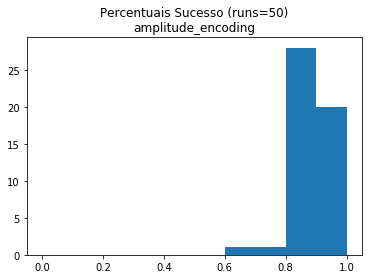

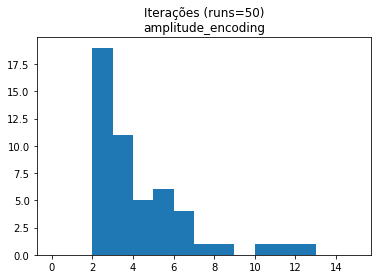

In [4]:
%matplotlib inline

import time
import math as m
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import rand
from sklearn import datasets
from qiskit import(
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer)
from qiskit.visualization import plot_histogram

def loss(target, expectation_value):
    return (1 - (2*target-1) * (2*expectation_value-1)) / 2

def qubit_encoding(circuit, q, classical_data):
    '''
    Codifica a informação clássica no estado inicial usando o operador RY.
    '''
    for i in range(len(classical_data)):
        circuit.ry((2*classical_data[i]-1)*m.pi, q[i])

def amplitude_encoding(circuit, q, classical_data):
    '''
    Codifica a informação clássica numa superposição arbitrária do estado inicial.
    '''
    desired_vector = np.zeros(len(classical_data))
    for i in range(len(classical_data)):
        desired_vector[i] = (2*classical_data[i]-1)*m.pi
    
    desired_vector = desired_vector / np.sqrt(np.inner(desired_vector,desired_vector))
    
    circuit.initialize(desired_vector, q)


def mry(circuit, q, params):
    '''
    mry = Multiple RY.
    Função recursiva.
    Aplica a porta RY num conjunto de qubits e os conecta usando CNOT.
    '''
    n = len(q)
    if n < 3:
        circuit.ry(params[0], q[0])
        if n > 1:
            circuit.ry(params[1], q[1])
            circuit.cx(q[1], q[0])
    else:
        k = m.ceil(n / 2)
        mry(circuit, q[:k], params[:k])
        mry(circuit, q[k:], params[k:])


def quantum_processing(n, classical_data, params, draw_circuit=False, draw_filename=None):
    '''
    Algorítmo quântico.
    Monta a rede neural quântica para classificar a informação clássica (classical_data).
    '''
    
    q = QuantumRegister(n, "q")
    c = ClassicalRegister(1, "c")
    circuit = QuantumCircuit(q, c)
    
    if (ENCODING == QUBIT_ENCODING):
        qubit_encoding(circuit, q, classical_data)
    else: # AMPLITUDE_ENCODING
        amplitude_encoding(circuit, q, classical_data)

    circuit.barrier() # pylint: disable=no-member

    layer = 0
    while True:
        ops_count = m.ceil(n / 2**layer)

        mry(circuit, q[:n:m.ceil(n / ops_count)], params[layer])
        circuit.barrier() # pylint: disable=no-member

        layer += 1
        if (ops_count <= 1):
            break

    circuit.measure(q[0], c[0]) # pylint: disable=no-member

    simulator = Aer.get_backend('qasm_simulator')
    
    job = execute(circuit, simulator, shots=128)
    result = job.result()
    counts = result.get_counts(circuit)

    if (draw_circuit):
        circuit.draw(output='latex', filename=draw_filename).show()
    
    if not('0' in counts):
        counts['0'] = 0
    if not('1' in counts):
        counts['1'] = 0

    return counts


def load_normalized_iris_set(training_set_size, test_set_size, desired_targets):
    ''' 
    Obtenção dos dados IRIS.
    Os dados clássicos devem ser reescalados para o intervalo [0, pi].
    '''
    iris = datasets.load_iris()

    iris_data_normed = iris.data / iris.data.max(axis=0) # pylint: disable=no-member

    randomized = np.array([ [*e[0], e[1]] for e in list(zip(iris_data_normed, iris.target))])[np.random.choice(len(iris_data_normed), size=len(iris_data_normed),replace=False), :] # pylint: disable=no-member

    randomized0 = np.array([e for e in randomized if e[4] == desired_targets[0] ])
    randomized1 = np.array([e for e in randomized if e[4] == desired_targets[1] ])
    
    training_data = np.concatenate((randomized0[:m.ceil(training_set_size/2)], randomized1[:m.ceil(training_set_size/2)]))
    randomized0 = np.delete(randomized0, range(m.ceil(training_set_size/2)), axis=0)
    randomized1 = np.delete(randomized1, range(m.ceil(training_set_size/2)), axis=0)

    test_data = np.concatenate((randomized0, randomized1))
    if (test_set_size < len(test_data)):
        test_data = test_data[:test_set_size]

    return training_data[np.random.choice(len(training_data),len(training_data),replace=False), :], test_data[np.random.choice(len(test_data),len(test_data),replace=False), :]


def initialize_unitary_parameters(n):
    parameters = []
    
    layer = 0
    while True:
        ops_count = m.ceil(n / 2**layer)

        parameters.append([ (2*i-1) * m.pi for i in rand(ops_count)])

        layer += 1
        if (ops_count <= 1):
            break

    return parameters

def gradient_vector(n, classical_data, params, target):
    e = 0.1
    grad_vector = [row[:] for row in params]
    for i in range(len(params)):
        for j in range(len(params[i])):
            parm = params[i][j]

            params[i][j] = parm + e
            counts = quantum_processing(n, classical_data, params)
            expectation_value_1 = (counts['1'] / (counts['0'] + counts['1']))

            params[i][j] = parm - e
            counts = quantum_processing(n, classical_data, params) 
            expectation_value_2 = (counts['1'] / (counts['0'] + counts['1']))

            params[i][j] = parm

            # Estimativa de segunda ordem ( O(e^2) ) para a derivada da função loss.
            grad_vector[i][j] = (loss(target, expectation_value_1) - loss(target, expectation_value_2))/(2*e)

    return grad_vector

def learn(rate, params, grad_vector, loss):
    flat_grad_vector = [item for sublist in grad_vector for item in sublist]
    inner_grad = np.inner(flat_grad_vector, flat_grad_vector)
    log(0, 'loss:', loss, '; inner_grad:', inner_grad)

    for i in range(len(params)):
        for j in range(len(params[i])):
            parameter = params[i][j]
            grad = grad_vector[i][j]
            
            if (grad != 0):
                params[i][j] = parameter - (rate*grad*loss/inner_grad)
    
def log(level, *values, end='\n'):
    if level >= VERBOSE:
        print(*values, end=end)

VERBOSE            = 10
QUBIT_ENCODING     = 0
AMPLITUDE_ENCODING = 1
ENCODING_STRING = {QUBIT_ENCODING : 'qubit_encoding', AMPLITUDE_ENCODING : 'amplitude_encoding'}

ENCODING = AMPLITUDE_ENCODING

def main():
    training_set_size = 10
    test_set_size = 1000
    iris_desired_targets = [0, 1]
    measure_probability_threshold = 0.75
    loss_threshold = 0.25
    learn_rate = 1
    runs = 50
    learn_iterations_limit = 15

    identification_rate = np.zeros(runs)
    iterations_rate = np.zeros(runs)

    reset_count = 0
    run = 0
    while run < runs:
        run += 1

        training_set, test_set = load_normalized_iris_set(training_set_size, test_set_size, iris_desired_targets)
        
        n = len(training_set[0])-1
        if (ENCODING == AMPLITUDE_ENCODING):
            n = m.ceil(m.log2(n))

        unitary_parameters = initialize_unitary_parameters(n)

        draw_circuit = False
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            log(0, 'Iteração: ', iterations)
        
            learned = True
            for data in training_set:
                counts = quantum_processing(n, data[0:-1], unitary_parameters, draw_circuit=draw_circuit)
                draw_circuit = False

                target = int(data[-1])
                expectation_value = (counts['1'] / (counts['0'] + counts['1']))
                probability = (counts[str(target)] / (counts['0'] + counts['1']))
                
                l = loss(target, expectation_value)
                            
                log(0, "LOSS:", '%.2f' % (l), end='')
                log(0, "\tTgt:", target, " Cnt:", counts, end='')
                if (probability >= measure_probability_threshold):
                    log(0, "\tOK :", '%.2f' % (probability), "%")
                else:
                    log(0, "\tERR:", '%.2f' % (probability), "%")
                
                if (l > loss_threshold):
                    log(0, 'learning...')
                    learned = False
                    grad_vector = gradient_vector(n, data[0:-1], unitary_parameters, target)
                    learn(learn_rate, unitary_parameters, grad_vector, l)

            if (learned or iterations >= learn_iterations_limit):
                break
        
        if (not learned):
            log(1, 'Learn iterations limit: ', learn_iterations_limit)
            run -= 1
            reset_count += 1
            continue

        ok_count = 0
        for data in test_set:
            counts = quantum_processing(n, data[0:-1], unitary_parameters)
            
            target = int(data[-1])
            probability = (counts[str(target)] / (counts['0'] + counts['1']))
                        
            log(0, "\tTgt:", target, " Cnt:", counts, end='')
            if (probability >= measure_probability_threshold):
                log(0, " OK :", '%.2f' % (probability), "%")
                ok_count += 1
            else:
                log(0, " ERR:", '%.2f' % (probability), "%")
        
        elapsed_time = time.time() - start_time

        iterations_rate[run-1] = iterations
        identification_rate[run-1] = ok_count / len(test_set)

        log(1, '\nRun            : ', run+1)
        log(1, 'Codificação    : ', ENCODING_STRING[ENCODING])
        log(1, 'Iterações      : ', iterations)
        log(1, 'Acertos        : ', ok_count)
        log(1, 'Erros          : ', len(test_set) - ok_count)

        log(1, 'Taxa de Acertos: ', ok_count / len(test_set))

        log(1, 'Parâmetros     : ')
        layer = 0
        for i in unitary_parameters:
            layer += 1 
            log(1, 'Camada ', layer, '     : ', i)

        log(10, run,';',ENCODING_STRING[ENCODING],';',len(training_set),';',len(test_set),';',iterations,';',ok_count, ';', start_time, ';', elapsed_time)

    log(10, 'Reset count : ', reset_count)

    plt.hist(identification_rate, bins=np.arange(0, 1.1, 0.10))
    plt.title("Percentuais Sucesso (runs=" + str(runs) + ")\n"+ENCODING_STRING[ENCODING])
    plt.show()

    plt.hist(iterations_rate, bins=np.arange(0, 16, 1))
    plt.title("Iterações (runs=" + str(runs) + ")\n"+ENCODING_STRING[ENCODING])
    plt.show()

if __name__ == "__main__":
    main()
 

## Prática: MERA



Resumo curto sobre MERA (Multi-scale Entanglement Renormalization Ansatz)

### Qiskit
Implementação utilizando Python e Qiskit

## Conclusões e Comentários